In [1]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import warnings
warnings.filterwarnings("ignore")

In [2]:
cid = "XXX"
secret = "XXX"
#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

### Q4. What patterns of repeated success among the artists?

In [3]:
df_1 = pd.read_csv('top_200_weekly.csv')
print(df_1.shape)
df_1.head()

(52200, 9)


,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-30,2017-01-06,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2016-12-30,2017-01-06,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,2016-12-30,2017-01-06,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2016-12-30,2017-01-06,4pdPtRcBmOSQDlJ3Fk945m,spotify:track:4pdPtRcBmOSQDlJ3Fk945m
4,5,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,2016-12-30,2017-01-06,3NdDpSvN911VPGivFlV5d0,spotify:track:3NdDpSvN911VPGivFlV5d0


In [4]:
#Thankfully no nulls!
df_1.isnull().sum()

Position      0
Track Name    7
Artist        7
Streams       0
URL           0
Week Start    0
Week End      0
ID            0
URI           0
dtype: int64

In [5]:
# df_2 = pd.read_csv('week_position.csv',skiprows=1,header=0)
# print(df_2.shape)
# df_2.head()

In [6]:
# data_artist = df_1.groupby(by=['Artist','ID']).count()['URI']

In [7]:
data_artist = df_1.groupby(by=['Artist','ID']).count().reset_index().groupby(by=['Artist']).count()['ID'].sort_values()

In [8]:
# df_1.groupby(by=['Artist']).count()['ID'].nunique()

In [9]:
data_artist.sort_values()

Artist
$uicideboy$              1
Diego & Victor Hugo      1
BØRNS                    1
Anita Kerr Singers       1
zzoilo                   1
                      ... 
Post Malone             73
BTS                     74
Juice WRLD              76
Drake                  118
Taylor Swift           127
Name: ID, Length: 956, dtype: int64

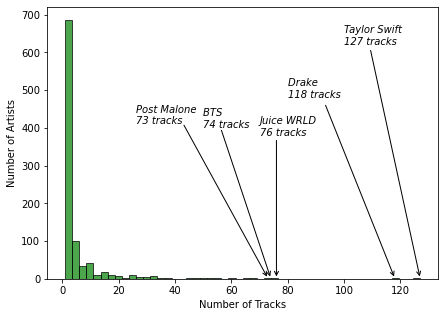

In [10]:
fig, ax = plt.subplots(figsize=(7,5))
# plt.hist(data_artist,bins=100,facecolor='g', alpha=0.7)
plt.hist(data_artist, 50, facecolor='green',edgecolor="black", alpha=0.7)#,rwidth=0.85)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('Number of songs vs Streams')
# Post Malone             73
# BTS                     74
# Juice WRLD              76
# Drake                  118
# Taylor Swift           127
# top1
ax.annotate(text='', xy=(127, 1),  xycoords='data',
            xytext=(-50, 230), textcoords='offset points',#'axes fraction',
            arrowprops=dict(arrowstyle='->',facecolor='black'),#, shrink=0.05,width=0.3,headwidth=3),
            # horizontalalignment='right', verticalalignment='top',
            # textprops=dict()
            )
ax.text(100, 620, 'Taylor Swift \n127 tracks', style='italic',fontweight='medium')
        # bbox={'facecolor': 'g', 'alpha': 0.5, 'pad': 10})
# top2
ax.annotate(text='', xy=(118, 1),  xycoords='data',
            xytext=(-70, 175), textcoords='offset points',#'axes fraction',
            arrowprops=dict(arrowstyle='->',facecolor='black'),#, shrink=0.05,width=0.3,headwidth=3),
            )
ax.text(80, 480, "Drake \n118 tracks", style='italic',fontweight='medium')
        # bbox={'facecolor': 'g', 'alpha': 0.35, 'pad': 10})

# top3
ax.annotate(text='', xy=(76, 1),  xycoords='data',
            xytext=(-0, 140), textcoords='offset points',#'axes fraction',
            arrowprops=dict(arrowstyle='->',facecolor='black'),#, shrink=0.05,width=0.3,headwidth=3),
            )
ax.text(70, 380, "Juice WRLD \n76 tracks", style='italic',fontweight='medium')
        # bbox={'facecolor': 'g', 'alpha': 0.2, 'pad': 10})

# top4
ax.annotate(text='', xy=(74, 1),  xycoords='data',
            xytext=(-50, 150), textcoords='offset points',#'axes fraction',
            arrowprops=dict(arrowstyle='->',facecolor='black'),#, shrink=0.05,width=0.3,headwidth=3),
            )
ax.text(50, 400, "BTS \n74 tracks", style='italic',fontweight='medium')

# top5
ax.annotate(text='', xy=(73, 1),  xycoords='data',
            xytext=(-85, 155), textcoords='offset points',#'axes fraction',
            arrowprops=dict(arrowstyle='->',facecolor='black'),#, shrink=0.05,width=0.3,headwidth=3),
            )
ax.text(26, 410, "Post Malone \n73 tracks", style='italic',fontweight='medium')

plt.xlabel('Number of Tracks')
plt.ylabel('Number of Artists')
plt.savefig('figures/figure8.png',dpi=300)
plt.show()

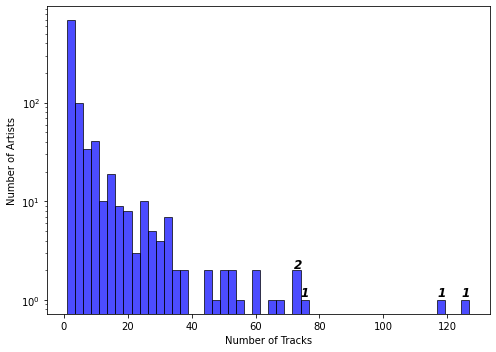

In [11]:
fig, ax = plt.subplots(figsize=(7,5))
# plt.hist(data_artist,bins=100,facecolor='b', alpha=0.7)
plt.hist(data_artist, 50, facecolor='blue',edgecolor="black", alpha=0.7)#,rwidth=0.85)
# plt.xscale('log')
plt.yscale('log')
# plt.title('Number of songs vs Streams')
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Artists')

ax.text(117, 1.1, "1", style='italic',fontweight='bold',c='black',fontsize=12)
ax.text(124.5, 1.1, "1", style='italic',fontweight='bold',c='black',fontsize=12)
ax.text(74, 1.1, "1", style='italic',fontweight='bold',c='black',fontsize=12)
ax.text(72, 2.1, "2", style='italic',fontweight='bold',c='black',fontsize=12)
plt.tight_layout()

plt.savefig('figures/figure9.png',dpi=300)
plt.show()


In [12]:
df_1.groupby(by=['Artist','ID']).count().reset_index().groupby(by=['Artist']).count().sort_values(by=['Position'])

,ID,Position,Track Name,Streams,URL,Week Start,Week End,URI
Artist,,,,,,,,
$uicideboy$,1,1,1,1,1,1,1,1
Macklemore & Ryan Lewis,1,1,1,1,1,1,1,1
Madame,1,1,1,1,1,1,1,1
Maes,1,1,1,1,1,1,1,1
Maggie Lindemann,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
Post Malone,73,73,73,73,73,73,73,73
BTS,74,74,74,74,74,74,74,74
Juice WRLD,76,76,76,76,76,76,76,76


Taylor Swift

In [13]:
df_1[df_1.Artist=='Taylor Swift'].sort_values(by=['Streams'])

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI
4798,199,Bad Blood,Taylor Swift,3093718,https://open.spotify.com/track/0TvQLMecTE8utzo...,2017-06-09,2017-06-16,0TvQLMecTE8utzoNmvXRbK,spotify:track:0TvQLMecTE8utzoNmvXRbK
9598,199,Gorgeous,Taylor Swift,3299853,https://open.spotify.com/track/5Gd19NupVe5X8bA...,2017-11-24,2017-12-01,5Gd19NupVe5X8bAqxf9Iaz,spotify:track:5Gd19NupVe5X8bAqxf9Iaz
10795,196,Delicate,Taylor Swift,3502740,https://open.spotify.com/track/6NFyWDv5Cjfwuzo...,2018-01-05,2018-01-12,6NFyWDv5CjfwuzoCkw47Xf,spotify:track:6NFyWDv5CjfwuzoCkw47Xf
10587,188,Delicate,Taylor Swift,3544827,https://open.spotify.com/track/6NFyWDv5Cjfwuzo...,2017-12-29,2018-01-05,6NFyWDv5CjfwuzoCkw47Xf,spotify:track:6NFyWDv5CjfwuzoCkw47Xf
10786,187,...Ready For It?,Taylor Swift,3685411,https://open.spotify.com/track/2yLa0QULdQr0qAI...,2018-01-05,2018-01-12,2yLa0QULdQr0qAIvVwN6B5,spotify:track:2yLa0QULdQr0qAIvVwN6B5
...,...,...,...,...,...,...,...,...,...
7000,1,Look What You Made Me Do,Taylor Swift,35206453,https://open.spotify.com/track/6uFsE1JgZ20EXyU...,2017-09-01,2017-09-08,6uFsE1JgZ20EXyU0JQZbUR,spotify:track:6uFsE1JgZ20EXyU0JQZbUR
37200,1,cardigan,Taylor Swift,35783009,https://open.spotify.com/track/4R2kfaDFhslZEMJ...,2020-07-24,2020-07-31,4R2kfaDFhslZEMJqAFNpdd,spotify:track:4R2kfaDFhslZEMJqAFNpdd
24201,2,ME! (feat. Brendon Urie of Panic! At The Disco),Taylor Swift,37826059,https://open.spotify.com/track/4Sib57MmYGJzSvk...,2019-04-26,2019-05-03,4Sib57MmYGJzSvkW84jTwh,spotify:track:4Sib57MmYGJzSvkW84jTwh
50800,1,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,41903929,https://open.spotify.com/track/5enxwA8aAbwZbf5...,2021-11-12,2021-11-19,5enxwA8aAbwZbf5qCHORXi,spotify:track:5enxwA8aAbwZbf5qCHORXi


In [14]:
df_1[(df_1.Artist=='Taylor Swift') & (df_1.ID=='1u8c2t2Cy7UBoG4ArRcF5g')]

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI
4746,147,Blank Space,Taylor Swift,3805516,https://open.spotify.com/track/1u8c2t2Cy7UBoG4...,2017-06-09,2017-06-16,1u8c2t2Cy7UBoG4ArRcF5g,spotify:track:1u8c2t2Cy7UBoG4ArRcF5g
49589,190,Blank Space,Taylor Swift,5181671,https://open.spotify.com/track/1u8c2t2Cy7UBoG4...,2021-09-24,2021-10-01,1u8c2t2Cy7UBoG4ArRcF5g,spotify:track:1u8c2t2Cy7UBoG4ArRcF5g
49792,193,Blank Space,Taylor Swift,4983823,https://open.spotify.com/track/1u8c2t2Cy7UBoG4...,2021-10-01,2021-10-08,1u8c2t2Cy7UBoG4ArRcF5g,spotify:track:1u8c2t2Cy7UBoG4ArRcF5g
49991,192,Blank Space,Taylor Swift,5085339,https://open.spotify.com/track/1u8c2t2Cy7UBoG4...,2021-10-08,2021-10-15,1u8c2t2Cy7UBoG4ArRcF5g,spotify:track:1u8c2t2Cy7UBoG4ArRcF5g
50396,197,Blank Space,Taylor Swift,5226473,https://open.spotify.com/track/1u8c2t2Cy7UBoG4...,2021-10-22,2021-10-29,1u8c2t2Cy7UBoG4ArRcF5g,spotify:track:1u8c2t2Cy7UBoG4ArRcF5g
50772,173,Blank Space,Taylor Swift,5438785,https://open.spotify.com/track/1u8c2t2Cy7UBoG4...,2021-11-05,2021-11-12,1u8c2t2Cy7UBoG4ArRcF5g,spotify:track:1u8c2t2Cy7UBoG4ArRcF5g
50939,140,Blank Space,Taylor Swift,6727887,https://open.spotify.com/track/1u8c2t2Cy7UBoG4...,2021-11-12,2021-11-19,1u8c2t2Cy7UBoG4ArRcF5g,spotify:track:1u8c2t2Cy7UBoG4ArRcF5g
51170,171,Blank Space,Taylor Swift,5787935,https://open.spotify.com/track/1u8c2t2Cy7UBoG4...,2021-11-19,2021-11-26,1u8c2t2Cy7UBoG4ArRcF5g,spotify:track:1u8c2t2Cy7UBoG4ArRcF5g


In [15]:
df_1[df_1.Artist=='Drake'].sort_values(by=['Streams'])

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI
993,194,Jumpman,Drake,2828148,https://open.spotify.com/track/27GmP9AWRs744Sz...,2017-01-27,2017-02-03,27GmP9AWRs744SzKcpJsTZ,spotify:track:27GmP9AWRs744SzKcpJsTZ
991,192,Hotline Bling,Drake,2855807,https://open.spotify.com/track/2FBUoWkIuQXwayw...,2017-01-27,2017-02-03,2FBUoWkIuQXwayw2RNo5l6,spotify:track:2FBUoWkIuQXwayw2RNo5l6
782,183,Hotline Bling,Drake,2883636,https://open.spotify.com/track/2FBUoWkIuQXwayw...,2017-01-20,2017-01-27,2FBUoWkIuQXwayw2RNo5l6,spotify:track:2FBUoWkIuQXwayw2RNo5l6
781,182,Jumpman,Drake,2888190,https://open.spotify.com/track/27GmP9AWRs744Sz...,2017-01-20,2017-01-27,27GmP9AWRs744SzKcpJsTZ,spotify:track:27GmP9AWRs744SzKcpJsTZ
1399,200,Hotline Bling,Drake,2923879,https://open.spotify.com/track/2FBUoWkIuQXwayw...,2017-02-10,2017-02-17,2FBUoWkIuQXwayw2RNo5l6,spotify:track:2FBUoWkIuQXwayw2RNo5l6
...,...,...,...,...,...,...,...,...,...
11200,1,God's Plan,Drake,54061893,https://open.spotify.com/track/2XW4DbS6NddZxRP...,2018-01-26,2018-02-02,2XW4DbS6NddZxRPm5rMCeY,spotify:track:2XW4DbS6NddZxRPm5rMCeY
12000,1,God's Plan,Drake,54891573,https://open.spotify.com/track/2XW4DbS6NddZxRP...,2018-02-23,2018-03-02,2XW4DbS6NddZxRPm5rMCeY,spotify:track:2XW4DbS6NddZxRPm5rMCeY
16400,1,In My Feelings,Drake,60285459,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,2018-07-27,2018-08-03,2G7V7zsVDxg1yRsu7Ew9RJ,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ
16200,1,In My Feelings,Drake,65825491,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,2018-07-20,2018-07-27,2G7V7zsVDxg1yRsu7Ew9RJ,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ


In [16]:
df_artists = pd.read_csv("artists_info.csv")
df_artists.head()

,artist_id,artist_name,genres,popularity,followers
0,53XhwfbYqKCa1cC15pYq2q,Imagine Dragons,"['modern rock', 'rock']",87,41005280
1,1Xylc3o4UrD53lo9CvFvVg,Zara Larsson,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",75,10193928
2,6JL8zeS1NmiOftqZTRgdTz,Meghan Trainor,"['dance pop', 'hip pop', 'pop', 'post-teen pop']",73,11472494
3,1pPmIToKXyGdsCF6LmqLmI,Rich The Kid,"['atl hip hop', 'hip hop', 'melodic rap', 'plu...",68,2869216
4,4ScCswdRlyA23odg9thgIO,Jess Glynne,"['australian pop', 'dance pop', 'pop', 'pop da...",71,2774474


In [27]:
df_artists.rename(columns={'artist_name':'Artist'},inplace=True)
df_artists.head()

,artist_id,Artist,genres,popularity,followers
0,53XhwfbYqKCa1cC15pYq2q,Imagine Dragons,"['modern rock', 'rock']",87,41005280
1,1Xylc3o4UrD53lo9CvFvVg,Zara Larsson,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",75,10193928
2,6JL8zeS1NmiOftqZTRgdTz,Meghan Trainor,"['dance pop', 'hip pop', 'pop', 'post-teen pop']",73,11472494
3,1pPmIToKXyGdsCF6LmqLmI,Rich The Kid,"['atl hip hop', 'hip hop', 'melodic rap', 'plu...",68,2869216
4,4ScCswdRlyA23odg9thgIO,Jess Glynne,"['australian pop', 'dance pop', 'pop', 'pop da...",71,2774474


In [28]:
df_merge = pd.merge(df_1,df_artists,on='Artist')

In [29]:
df_merge.head()

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI,artist_id,genres,popularity,followers
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-30,2017-01-06,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,1Xyo4u8uXC1ZmMpatF05PJ,"['canadian contemporary r&b', 'canadian pop', ...",91,46564928
1,10,I Feel It Coming,The Weeknd,16609685,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2016-12-30,2017-01-06,5GXAXm5YOmYT0kL5jHvYBt,spotify:track:5GXAXm5YOmYT0kL5jHvYBt,1Xyo4u8uXC1ZmMpatF05PJ,"['canadian contemporary r&b', 'canadian pop', ...",91,46564928
2,51,Party Monster,The Weeknd,6656284,https://open.spotify.com/track/4F7A0DXBrmUAkp3...,2016-12-30,2017-01-06,4F7A0DXBrmUAkp32uenhZt,spotify:track:4F7A0DXBrmUAkp32uenhZt,1Xyo4u8uXC1ZmMpatF05PJ,"['canadian contemporary r&b', 'canadian pop', ...",91,46564928
3,101,Sidewalks,The Weeknd,4342298,https://open.spotify.com/track/4h90qkbnW1Qq6pB...,2016-12-30,2017-01-06,4h90qkbnW1Qq6pBhoPvwko,spotify:track:4h90qkbnW1Qq6pBhoPvwko,1Xyo4u8uXC1ZmMpatF05PJ,"['canadian contemporary r&b', 'canadian pop', ...",91,46564928
4,111,Six Feet Under,The Weeknd,4080235,https://open.spotify.com/track/4mU5iXHeLgbR94s...,2016-12-30,2017-01-06,4mU5iXHeLgbR94siF7p1sY,spotify:track:4mU5iXHeLgbR94siF7p1sY,1Xyo4u8uXC1ZmMpatF05PJ,"['canadian contemporary r&b', 'canadian pop', ...",91,46564928


In [30]:
df_merge.genres

0        ['canadian contemporary r&b', 'canadian pop', ...
1        ['canadian contemporary r&b', 'canadian pop', ...
2        ['canadian contemporary r&b', 'canadian pop', ...
3        ['canadian contemporary r&b', 'canadian pop', ...
4        ['canadian contemporary r&b', 'canadian pop', ...
                               ...                        
52184    ['brazilian hip hop', 'funk carioca', 'trap br...
52185                                                   []
52186                                   ['afro dancehall']
52187                                     ['alt z', 'pop']
52188    ['album rock', 'blues rock', 'classic uk pop',...
Name: genres, Length: 52189, dtype: object

In [31]:
from itertools import chain, combinations
set(combinations(['modern rock', 'rock'],r=2))

{('modern rock', 'rock')}

In [32]:
edges = set()
for g in list(map(eval,df_artists.genres)):
    # print(g)
    temp = set(combinations(g,r=2))
    edges = edges.union(temp)

In [33]:
len(edges)

2202

### Q5. Musical genre analysis over Genre Network based on artists

In [34]:
# Dependencies
import numpy as np 
import pandas as pd 
import seaborn as sns
from subprocess import check_output
import matplotlib.pyplot as plt
import networkx as nx

In [35]:
G = nx.Graph()
G = nx.from_edgelist(edges)
print(nx.info(G))

Graph with 521 nodes and 2202 edges


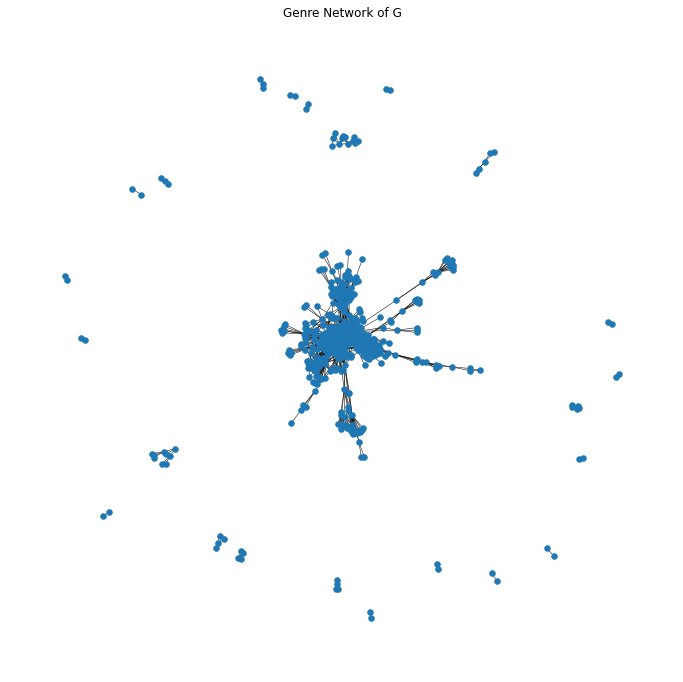

In [36]:
options = {
    'node_size': 30,
    'width': 0.5
}

plt.figure(figsize=(12,12))
plt.title("Genre Network of G")
pos = nx.spring_layout(G)
nx.draw(G, pos, **options)

plt.savefig('figures/GenreNetwork.png',dpi=300)
plt.show()

In [37]:
# plt.figure(figsize=(20, 10))
# pos=nx.spring_layout(G, k=0.15)
# nx.draw_networkx(G,pos,node_size=25, node_color='blue')

# plt.show()

In [38]:
nx.number_connected_components(G)

24

In [39]:
largest_cc = max(nx.connected_components(G), key=len)
len(largest_cc)

444

In [40]:
nx.clustering(G)

{'classic rock': 0.3695652173913043,
 'country rock': 1.0,
 'afrofuturism': 0.8181818181818182,
 'electropop': 0.24235294117647058,
 'southern hip hop': 0.27990708478513354,
 'sudanese hip hop': 1.0,
 'permanent wave': 0.2943722943722944,
 'pop': 0.07104660045836517,
 'classic soul': 0.5714285714285714,
 'quiet storm': 0.6071428571428571,
 'blues rock': 0.6060606060606061,
 'glam rock': 0.6785714285714286,
 'indonesian pop': 0,
 'indonesian singer-songwriter': 0,
 'canadian trap': 0.9111111111111111,
 'trap': 0.1830601092896175,
 'edm': 0.20601092896174864,
 'uk funky': 1.0,
 'disco': 0.4909090909090909,
 'dirty south rap': 0.7307692307692307,
 'memphis hip hop': 0.9444444444444444,
 'eurodance': 0.6666666666666666,
 'new wave pop': 0.375,
 'canadian pop': 0.3416666666666667,
 'pop rap': 0.14145569620253165,
 'alternative metal': 0.4642857142857143,
 'german metal': 1.0,
 'italian hip hop': 0.2857142857142857,
 'italian pop': 0.21428571428571427,
 'argentine hip hop': 0.7,
 'trap trist

In [41]:
# https://jmperezperez.com/spotify-most-followed-popular-artists-genres/
select = [
'pop',
'dance pop',
'house',
'teen pop',
'electro house',
'edm',
'pop rap',
'pop christmas',
'pop rock',
'r&b',
'big room',
'alternative hip hop',
'urban contemporary',
'progressive electro house',
'indie r&b',
'indietronica',
'permanent wave',
'synthpop',
'contemporary country',
'neo mellow' ]

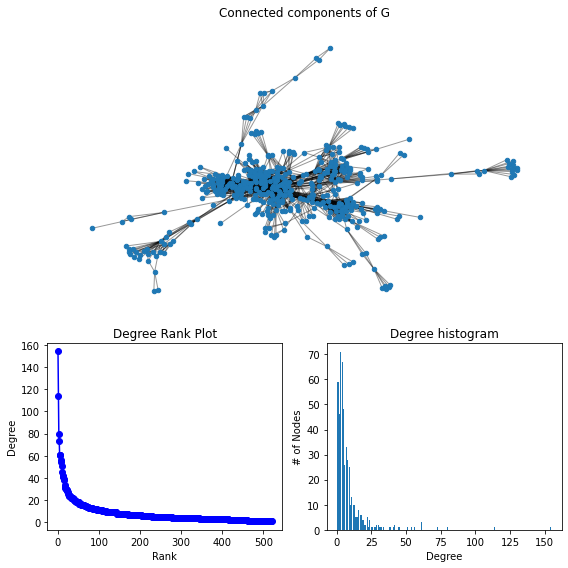

In [43]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()

plt.savefig('figures/Gcc.png',dpi=300)
plt.show()

In [44]:
dict(sorted(G.degree(), key=lambda item: item[1],reverse=True))

{'pop': 154,
 'dance pop': 114,
 'pop rap': 80,
 'rap': 73,
 'trap': 61,
 'edm': 61,
 'pop dance': 61,
 'hip hop': 56,
 'tropical house': 54,
 'electropop': 51,
 'latin': 45,
 'southern hip hop': 42,
 'rock': 42,
 'latin pop': 41,
 'electro house': 39,
 'post-teen pop': 38,
 'trap latino': 34,
 'melodic rap': 32,
 'modern rock': 31,
 'r&b': 30,
 'alt z': 30,
 'pop edm': 29,
 'reggaeton': 29,
 'mellow gold': 28,
 'pop rock': 27,
 'indie pop': 26,
 'underground hip hop': 25,
 'classic rock': 24,
 'slap house': 24,
 'uk pop': 24,
 'vapor trap': 24,
 'indie poptimism': 23,
 'permanent wave': 22,
 'funk carioca': 22,
 'metropopolis': 22,
 'europop': 22,
 'gangster rap': 22,
 'soft rock': 21,
 'urban contemporary': 21,
 'colombian pop': 20,
 'big room': 20,
 'alternative r&b': 19,
 'album rock': 19,
 'progressive electro house': 19,
 'house': 19,
 'neo mellow': 18,
 'dominican pop': 18,
 'escape room': 18,
 'adult standards': 18,
 'latin hip hop': 18,
 'german techno': 18,
 'new wave pop': 1